In [1]:
import sys
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection


%matplotlib inline

colors = ['r','b','c','g','k','m','y']
np.set_printoptions(3)

sys.path.append('../')

import Sonar.StackedAutoEncoder as SAE

Using Theano backend.


# Load Data

In [2]:
dataset = datasets.load_iris()
data = dataset.data
target = dataset.target

## Select Novelty 

In [3]:
novcls = 2
nov_data = data[target==novcls]
nov_target = target[target==novcls]
#
data   = data[target != novcls]
target = target[target != novcls]

## Training Indexes 

In [4]:
# Test x Development
ntrn = 0.7
Xtrn, Xtst, Ytrn, Ytst = model_selection.train_test_split(data, target, test_size = 1.0-ntrn, stratify=target)

cv_indexes = []
kfold = model_selection.StratifiedKFold(n_splits=4)
for itrn, ival in kfold.split(Xtrn, Ytrn):
    cv_indexes.append({'itrn': itrn, 'ival': ival})

## Dataprep

In [5]:
scaler = preprocessing.StandardScaler().fit(data[itrn])
data = scaler.transform(data)
nov_data = scaler.transform(nov_data)

# Network  Configuration

In [7]:
net_config = {
    'hiddens': [Xtrn.shape[1], 10, 5, 2, 5, 10, Xtrn.shape[1]],
    'optimizers': ['adam','adam','adam'],
    'nepochs': 500,
    'batch_size': 100,
    'ninit': 10,    
    'patience' : 100,
    'itrn': itrn,
    'itst': ival,
    'ival': ival,
}

# Training 

In [8]:
try:
    model = SAE.StackedAutoEncoder(net_config)
    model.fit(Xtrn)
except Exception as err:
    import re, os
    x = re.match(r'C:\\Users\\txavier\\AppData\\Local\\Temp\\3\\\w*\.exe', err.__str__())
    if x is not None:
        print 'Removing file'
        os.remove(err.__str__()[x.start():x.endpos])

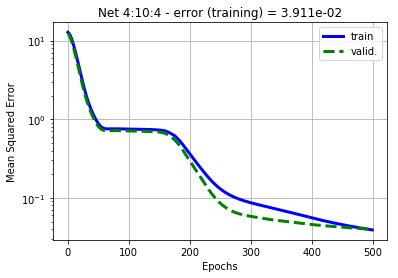

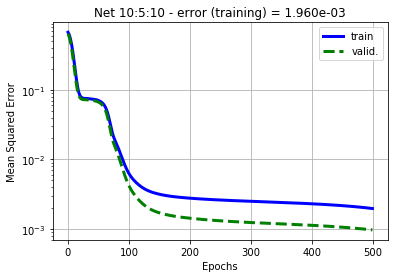

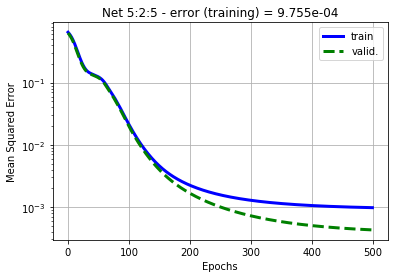

In [9]:
model.plot_training_curves()